In [146]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [149]:
with open('converted_unit.json', 'r') as f:
    experiments = json.load(f)
with open('test.json', 'r') as f:
    simulations = json.load(f)

sim_res_data = pd.read_csv('MOFs_res_data.csv', header=0)
exp_sa_data = pd.read_csv('Exp_surface_area.csv', header=0)
print(len(list(experiments)))
print(len(list(simulations)))

sim_res_data

139
139


,adsorbent,PLD,LCD,SA
0,ACUFEK_clean_DDEC.cif,8.41,15.04,3820.79
1,ACUTOI_clean_DDEC.cif,4.25,4.81,215.00
2,AHOLAM.Non-disordered_MOF_subset_DDEC.cif,5.02,9.46,907.34
3,AHORAR.MOF_subset_DDEC.cif,4.65,6.58,1310.90
4,AHOZII.Non-disordered_MOF_subset_DDEC.cif,5.85,6.89,961.81
...,...,...,...,...
146,YUGLES_clean_DDEC.cif,6.23,10.75,2789.11
147,YUKKAR_clean_DDEC.cif,3.97,5.61,740.42
148,YUVSUE.Non-disordered_MOF_subset_DDEC.cif,4.27,5.27,548.48
149,ZARZAV_clean_DDEC.cif,3.71,5.09,213.27


In [150]:
def get_data_from_json(list1, sim=True):
    if sim == True:
        pressures = []
        uptakes = []
        errors = []
        
        for value in list1:
            if value['pressure'] < 1000:
                continue
            elif value['uptake'] < 0:
                continue
            else:
                pressures.append(value['pressure'])
                uptakes.append(value['uptake'])
                errors.append(value['error'])
        return pressures, uptakes, errors
    else:
        pressures = []
        uptakes = []
        for value in list1:
            if value['pressure'] < 1000:
                continue
            elif value['uptake'] < 0:
                continue
            else:
                pressures.append(value['pressure'])
                uptakes.append(value['uptake'])
        return pressures, uptakes

In [191]:
temperatures = defaultdict(lambda:0)
adsorbates = defaultdict(lambda:0)
adsorbents = defaultdict(lambda:0)

final_simp = []
final_simu = []
final_sime = []

final_expp = []
final_expu = []
final_temp = []
final_adsorbate = []
final_adsorbent = []
for doi in list(simulations):
    if doi not in experiments:
        print('No data experimental data for {}'.format(doi))
        continue
    for iso in list(simulations[doi]):
        sim_data = simulations[doi][iso]
        exp_data = experiments[doi][iso]
        
        temperatures[exp_data['temperature']] += 1
        adsorbates[exp_data['adsorbate']] += 1
        adsorbents[exp_data['adsorbent']] += 1
        exp_iso = exp_data['isotherm_data']
        
        simp, simu, sime = get_data_from_json(sim_data)
        expp, expu = get_data_from_json(exp_iso, sim=False)
        
        compare_expp = []
        compare_expu = []
        compare_simu = []
        compare_simp = []
        compare_sime = []
        
        for scount, sp in enumerate(simp):
            check_match = False
            for ecount, ep in enumerate(expp):
                if abs(sp - ep) < 1:
                    compare_expp.append(ep)
                    compare_expu.append(expu[ecount])
                    compare_simp.append(sp)
                    compare_simu.append(simu[scount])
                    compare_sime.append(sime[scount])
                    check_match = True
                    break
                else:
                    continue
        if len(compare_simp) != len(compare_expp):
            print(iso)
            print(simp, compare_expp)
            
        for i, j, k in zip(compare_simp, compare_simu, compare_sime):
            final_simp.append(i)
            final_simu.append(j)
            final_sime.append(k)
            final_temp.append(exp_data['temperature'])
            final_adsorbate.append(exp_data['adsorbate'])
            final_adsorbent.append(exp_data['adsorbent'])
        for i, j in zip(compare_expp, compare_expu):
            final_expp.append(i)
            final_expu.append(j)
            
        test = [i - j for i, j in zip(compare_simu, compare_expu)]
        relative = [abs(i-j)/j for  i, j in zip(compare_simu, compare_expu)]
        if min(test) < -2000:
            print(iso, min(test))
        if min(relative) < -0:
            print(iso, min(relative), compare_expu[relative.index(min(relative))])
            
print(dict(adsorbates))
print(dict(temperatures))

No data experimental data for 10.1039c3cc48275h
{'Nitrogen': 110, 'Hydrogen': 126, 'Carbon Dioxide': 184, 'Methane': 89}
{77: 174, 87: 29, 195: 49, 273: 96, 298: 64, 78: 6, 100: 2, 125: 4, 150: 6, 200: 5, 240: 6, 270: 6, 290: 3, 296: 7, 295: 1, 293: 12, 323: 3, 278: 5, 288: 5, 308: 1, 283: 3, 303: 5, 280: 1, 196: 1, 348: 1, 263: 1, 50: 2, 65: 1, 313: 1, 353: 1, 88: 2, 231: 1, 318: 1, 338: 1, 300: 1, 220: 1, 30: 1}


In [188]:
combined_data = pd.DataFrame({
    'exp_pressure': final_expp,
    'exp_uptake': final_expu,
    'sim_pressure': final_simp,
    'sim_uptake': final_simu,
    'sim_error': final_sime,
    'temperature': final_temp,
    'adsorbate': final_adsorbate,
    'adsorbent': final_adsorbent
    
})

combined_data

,exp_pressure,exp_uptake,sim_pressure,sim_uptake,sim_error,temperature,adsorbate,adsorbent
0,10014.4,389.656800,10014.0,458.004137,0.901889,77,Nitrogen,LASYOU_clean_DDEC.cif
1,104619.0,420.244800,104619.0,458.199035,1.001565,77,Nitrogen,LASYOU_clean_DDEC.cif
2,28367.4,413.252800,28367.0,452.443373,4.817600,77,Nitrogen,LASYOU_clean_DDEC.cif
3,4770.7,378.295200,4771.0,437.226522,2.473131,77,Nitrogen,LASYOU_clean_DDEC.cif
4,100250.0,285.354788,100250.0,322.972613,6.006559,77,Hydrogen,LASYOU_clean_DDEC.cif
...,...,...,...,...,...,...,...,...
5411,6398080.0,61.975439,6398080.0,58.760988,2.360300,293,Hydrogen,KANMIX_clean_DDEC.cif
5412,695562.0,7.902546,695562.0,7.997123,0.614875,293,Hydrogen,KANMIX_clean_DDEC.cif
5413,7315730.0,71.335720,7315730.0,65.406757,2.285972,293,Hydrogen,KANMIX_clean_DDEC.cif
5414,8386320.0,80.935069,8386320.0,72.688380,1.176200,293,Hydrogen,KANMIX_clean_DDEC.cif


In [189]:
compared_data = pd.merge(combined_data, sim_res_data, on='adsorbent')

compared_data = pd.merge(compared_data, exp_sa_data, on='adsorbent')

compared_data['SA_ratio']=compared_data['SA']/compared_data['exp_SA']

compared_data['sim_uptake_scaled'] = compared_data['sim_uptake']/compared_data['SA_ratio']

compared_data

,exp_pressure,exp_uptake,sim_pressure,sim_uptake,sim_error,temperature,adsorbate,adsorbent,PLD,LCD,SA,exp_SA,SA_ratio,sim_uptake_scaled
0,10014.4,389.656800,10014.0,458.004137,0.901889,77,Nitrogen,LASYOU_clean_DDEC.cif,4.42,9.99,1868.46,967.0,1.932223,237.034778
1,104619.0,420.244800,104619.0,458.199035,1.001565,77,Nitrogen,LASYOU_clean_DDEC.cif,4.42,9.99,1868.46,967.0,1.932223,237.135645
2,28367.4,413.252800,28367.0,452.443373,4.817600,77,Nitrogen,LASYOU_clean_DDEC.cif,4.42,9.99,1868.46,967.0,1.932223,234.156868
3,4770.7,378.295200,4771.0,437.226522,2.473131,77,Nitrogen,LASYOU_clean_DDEC.cif,4.42,9.99,1868.46,967.0,1.932223,226.281562
4,100250.0,285.354788,100250.0,322.972613,6.006559,77,Hydrogen,LASYOU_clean_DDEC.cif,4.42,9.99,1868.46,967.0,1.932223,167.150764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,6398080.0,61.975439,6398080.0,58.760988,2.360300,293,Hydrogen,KANMIX_clean_DDEC.cif,3.73,9.44,984.74,1003.0,0.981795,59.850591
5100,695562.0,7.902546,695562.0,7.997123,0.614875,293,Hydrogen,KANMIX_clean_DDEC.cif,3.73,9.44,984.74,1003.0,0.981795,8.145413
5101,7315730.0,71.335720,7315730.0,65.406757,2.285972,293,Hydrogen,KANMIX_clean_DDEC.cif,3.73,9.44,984.74,1003.0,0.981795,66.619593
5102,8386320.0,80.935069,8386320.0,72.688380,1.176200,293,Hydrogen,KANMIX_clean_DDEC.cif,3.73,9.44,984.74,1003.0,0.981795,74.036238


In [154]:
compared_data['uptake_diff'] = compared_data['sim_uptake'] - compared_data['exp_uptake']
compared_data['rel_diff'] = (compared_data['sim_uptake'] - compared_data['exp_uptake'])/compared_data['exp_uptake']

compared_data['uptake_diff_scaled'] = compared_data['sim_uptake_scaled'] - compared_data['exp_uptake']
compared_data['rel_diff_scaled'] = (compared_data['sim_uptake_scaled'] - compared_data['exp_uptake'])/compared_data['exp_uptake']

compared_data['abs_rel_diff'] = abs((compared_data['sim_uptake'] - compared_data['exp_uptake']))/compared_data['exp_uptake']
compared_data_lowP = compared_data[compared_data['exp_pressure'] < 120000]


In [157]:
df_ch4 = compared_data_lowP[compared_data_lowP['adsorbate'] == 'Methane']
df_n2 = compared_data_lowP[compared_data_lowP['adsorbate'] == 'Nitrogen']
df_h2 = compared_data_lowP[compared_data_lowP['adsorbate'] == 'Hydrogen']
df_co2 = compared_data_lowP[compared_data_lowP['adsorbate'] == 'Carbon Dioxide']

print('N2: ', df_n2.shape)
print('CO2: ', df_co2.shape)
print('H2: ', df_h2.shape)
print('CH4: ', df_ch4.shape)


N2:  (1051, 19)
CO2:  (1550, 19)
H2:  (865, 19)
CH4:  (593, 19)


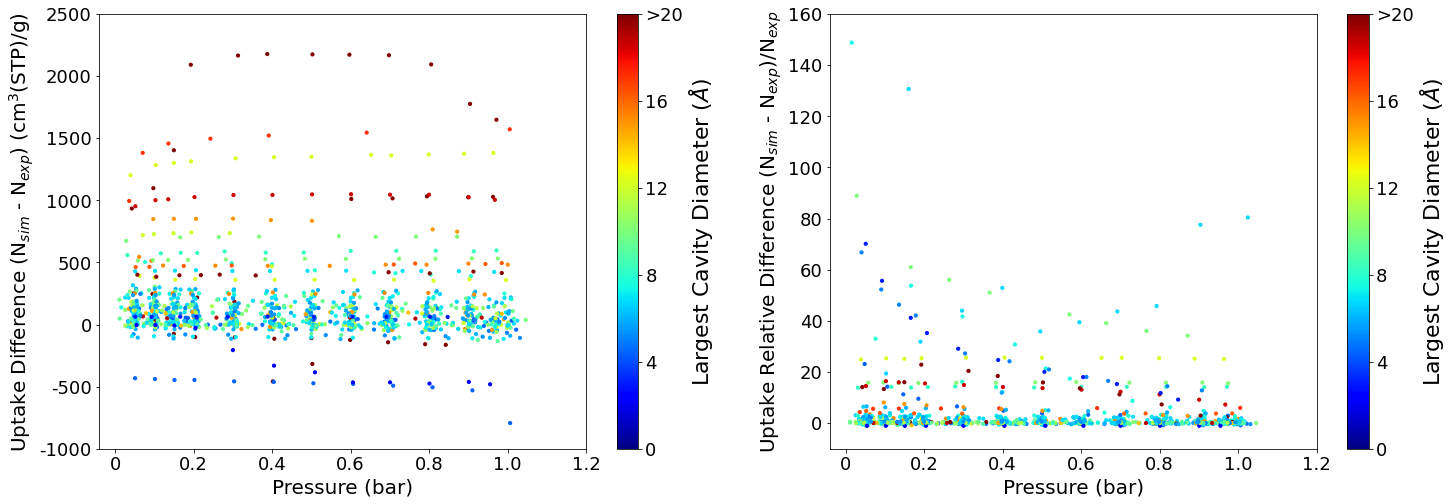

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
a0 = ax[0].scatter(df_n2['exp_pressure'], df_n2['uptake_diff'], c= df_n2['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax[0])
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[0].set_yticks([-1000, -500, 0, 500, 1000, 1500, 2000, 2500])
ax[0].set_yticklabels([-1000, -500, 0, 500, 1000, 1500, 2000, 2500], fontsize=18)
ax[0].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[0].set_xlabel('Pressure (bar)', fontsize=20)
ax[0].set_ylabel(r'Uptake Difference (N$_{sim}$ - N$_{exp}$) (cm$^3$(STP)/g)', fontsize=20)

a1 = ax[1].scatter(df_n2['exp_pressure'], df_n2['rel_diff'], c= df_n2['LCD'], s=10, cmap='jet')
cbar1 = fig.colorbar(a1, ticks=[0, 4, 8, 12, 16, 20], ax=ax[1])
cbar1.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a1.set_clim(0,20)
cbar1.ax.tick_params(labelsize=18)
cbar1.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[1].set_yticks([0, 20, 40, 60, 80, 100, 120, 140, 160])
ax[1].set_yticklabels([0, 20, 40, 60, 80, 100, 120, 140, 160], fontsize=18)
ax[1].set_ylim(-10, 160)
ax[1].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[1].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[1].set_xlabel('Pressure (bar)', fontsize=20)
ax[1].set_ylabel(r'Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)

fig.savefig('N2_isotherm_comparison_withLCD_nolim.png', dpi=600, bbox_inches='tight')

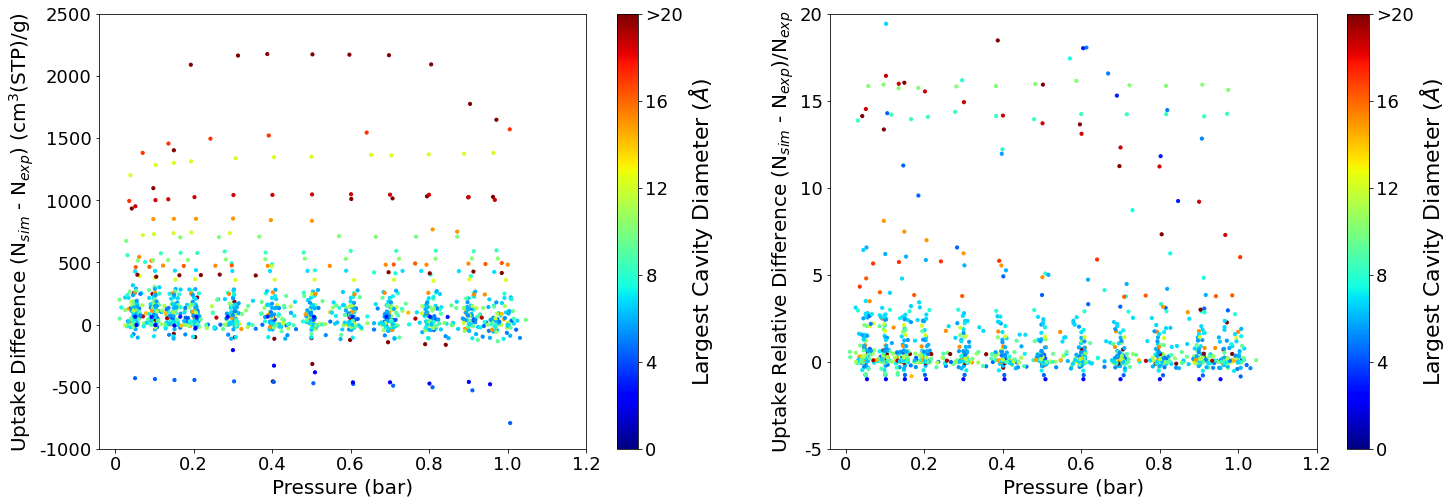

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
a0 = ax[0].scatter(df_n2['exp_pressure'], df_n2['uptake_diff'], c= df_n2['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax[0])
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[0].set_yticks([-1000, -500, 0, 500, 1000, 1500, 2000, 2500])
ax[0].set_yticklabels([-1000, -500, 0, 500, 1000, 1500, 2000, 2500], fontsize=18)
ax[0].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[0].set_xlabel('Pressure (bar)', fontsize=20)
ax[0].set_ylabel(r'Uptake Difference (N$_{sim}$ - N$_{exp}$) (cm$^3$(STP)/g)', fontsize=20)

a1 = ax[1].scatter(df_n2['exp_pressure'], df_n2['rel_diff'], c= df_n2['LCD'], s=10, cmap='jet')
cbar1 = fig.colorbar(a1, ticks=[0, 4, 8, 12, 16, 20], ax=ax[1])
cbar1.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a1.set_clim(0,20)
cbar1.ax.tick_params(labelsize=18)
cbar1.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[1].set_yticks([ -5, 0, 5, 10, 15, 20])
ax[1].set_yticklabels([ -5, 0, 5, 10, 15, 20], fontsize=18)
ax[1].set_ylim(-5, 20)
ax[1].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[1].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[1].set_xlabel('Pressure (bar)', fontsize=20)
ax[1].set_ylabel(r'Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)

fig.savefig('N2_isotherm_comparison_withLCD_lim_-5_20.png', dpi=600, bbox_inches='tight')

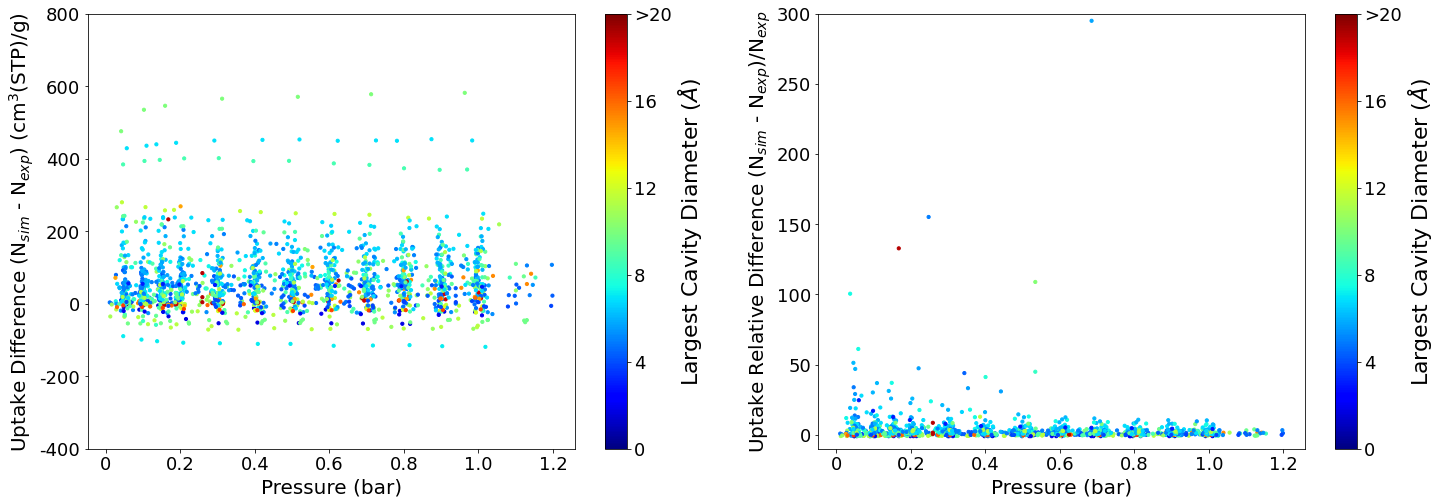

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
a0 = ax[0].scatter(df_co2['exp_pressure'], df_co2['uptake_diff'], c= df_co2['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax[0])
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])
ax[0].set_ylim(-400, 800)
ax[0].set_yticks([-400, -200, 0, 200, 400, 600, 800])
ax[0].set_yticklabels([-400, -200, 0, 200, 400, 600, 800], fontsize=18)
ax[0].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[0].set_xlabel('Pressure (bar)', fontsize=20)
ax[0].set_ylabel(r'Uptake Difference (N$_{sim}$ - N$_{exp}$) (cm$^3$(STP)/g)', fontsize=20)

a1 = ax[1].scatter(df_co2['exp_pressure'], df_co2['rel_diff'], c= df_co2['LCD'], s=10, cmap='jet')
cbar1 = fig.colorbar(a1, ticks=[0, 4, 8, 12, 16, 20], ax=ax[1])
cbar1.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a1.set_clim(0,20)
cbar1.ax.tick_params(labelsize=18)
cbar1.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[1].set_yticks([0, 50, 100, 150, 200, 250, 300])
ax[1].set_yticklabels([0, 50, 100, 150, 200, 250, 300], fontsize=18)
ax[1].set_ylim(-10, 300)
ax[1].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[1].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[1].set_xlabel('Pressure (bar)', fontsize=20)
ax[1].set_ylabel(r'Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)

fig.savefig('CO2_isotherm_comparison_withLCD_nolim.png', dpi=600, bbox_inches='tight')

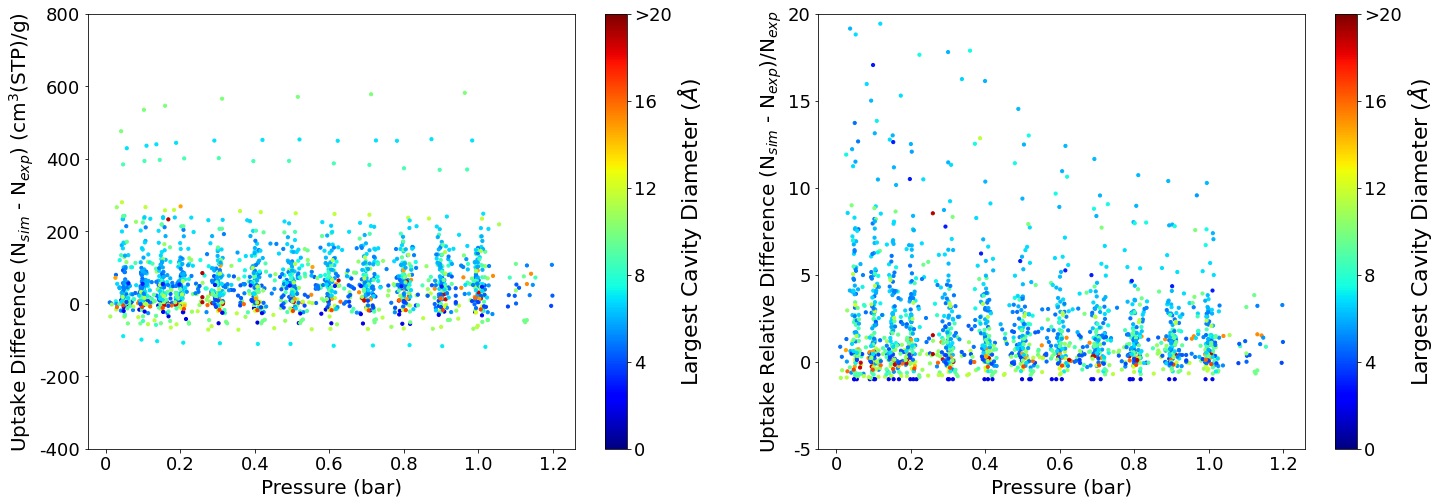

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
a0 = ax[0].scatter(df_co2['exp_pressure'], df_co2['uptake_diff'], c= df_co2['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax[0])
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])
ax[0].set_ylim(-400, 800)
ax[0].set_yticks([-400, -200, 0, 200, 400, 600, 800])
ax[0].set_yticklabels([-400, -200, 0, 200, 400, 600, 800], fontsize=18)
ax[0].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[0].set_xlabel('Pressure (bar)', fontsize=20)
ax[0].set_ylabel(r'Uptake Difference (N$_{sim}$ - N$_{exp}$) (cm$^3$(STP)/g)', fontsize=20)

a1 = ax[1].scatter(df_co2['exp_pressure'], df_co2['rel_diff'], c= df_co2['LCD'], s=10, cmap='jet')
cbar1 = fig.colorbar(a1, ticks=[0, 4, 8, 12, 16, 20], ax=ax[1])
cbar1.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a1.set_clim(0,20)
cbar1.ax.tick_params(labelsize=18)
cbar1.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[1].set_yticks([ -5, 0, 5, 10, 15, 20])
ax[1].set_yticklabels([-5, 0, 5, 10, 15, 20], fontsize=18)
ax[1].set_ylim(-5, 20)
ax[1].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[1].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[1].set_xlabel('Pressure (bar)', fontsize=20)
ax[1].set_ylabel(r'Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)

fig.savefig('CO2_isotherm_comparison_withLCD_lim_-5_20.png', dpi=600, bbox_inches='tight')

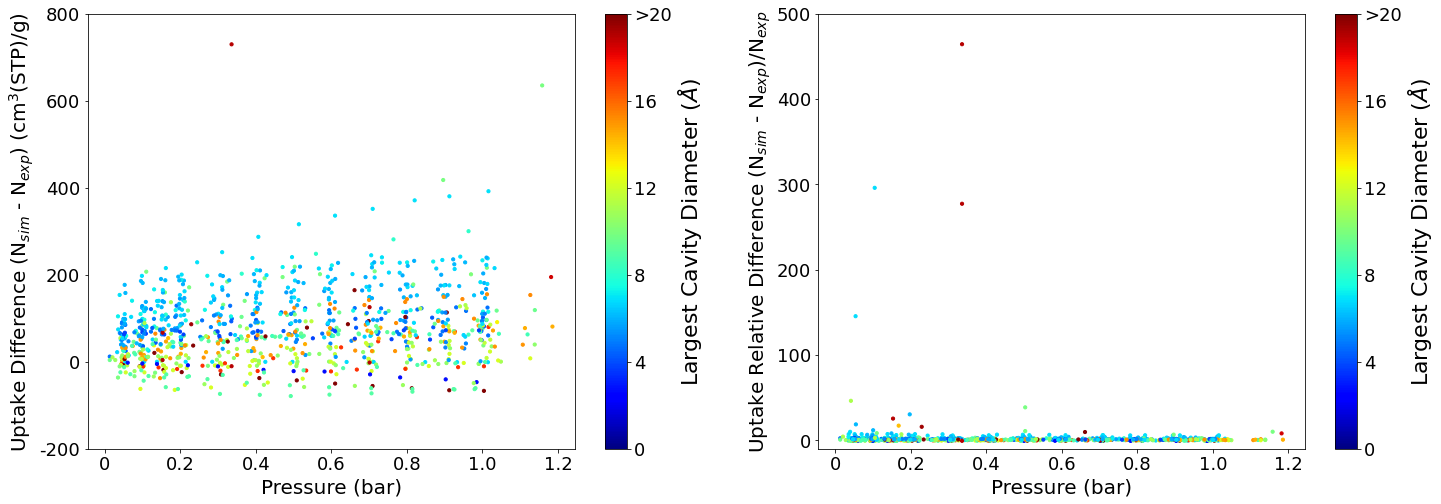

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
a0 = ax[0].scatter(df_h2['exp_pressure'], df_h2['uptake_diff'], c= df_h2['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax[0])
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])
ax[0].set_ylim(-200, 800)
ax[0].set_yticks([-200, 0, 200, 400, 600, 800])
ax[0].set_yticklabels([ -200, 0, 200, 400, 600, 800], fontsize=18)
ax[0].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[0].set_xlabel('Pressure (bar)', fontsize=20)
ax[0].set_ylabel(r'Uptake Difference (N$_{sim}$ - N$_{exp}$) (cm$^3$(STP)/g)', fontsize=20)

a1 = ax[1].scatter(df_h2['exp_pressure'], df_h2['rel_diff'], c= df_h2['LCD'], s=10, cmap='jet')
cbar1 = fig.colorbar(a1, ticks=[0, 4, 8, 12, 16, 20], ax=ax[1])
cbar1.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a1.set_clim(0,20)
cbar1.ax.tick_params(labelsize=18)
cbar1.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[1].set_yticks([0, 100, 200, 300, 400, 500])
ax[1].set_yticklabels([0, 100, 200, 300, 400, 500], fontsize=18)
ax[1].set_ylim(-10, 500)
ax[1].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[1].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[1].set_xlabel('Pressure (bar)', fontsize=20)
ax[1].set_ylabel(r'Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)

fig.savefig('H2_isotherm_comparison_withLCD_nolim.png', dpi=600, bbox_inches='tight')

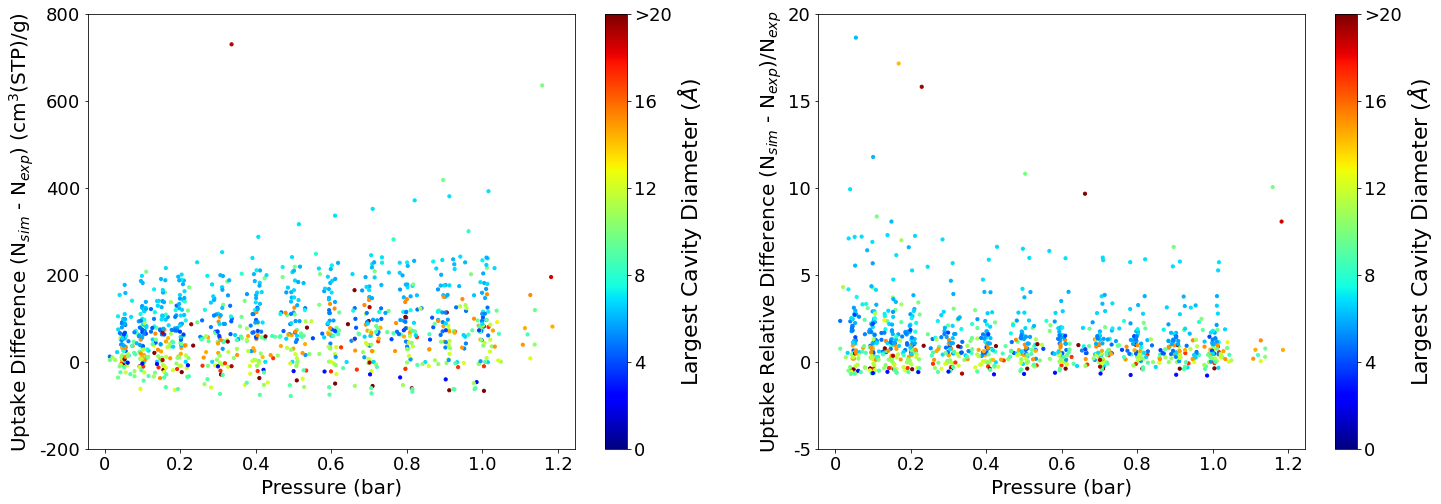

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
a0 = ax[0].scatter(df_h2['exp_pressure'], df_h2['uptake_diff'], c= df_h2['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax[0])
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])
ax[0].set_ylim(-200, 800)
ax[0].set_yticks([-200, 0, 200, 400, 600, 800])
ax[0].set_yticklabels([ -200, 0, 200, 400, 600, 800], fontsize=18)
ax[0].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[0].set_xlabel('Pressure (bar)', fontsize=20)
ax[0].set_ylabel(r'Uptake Difference (N$_{sim}$ - N$_{exp}$) (cm$^3$(STP)/g)', fontsize=20)

a1 = ax[1].scatter(df_h2['exp_pressure'], df_h2['rel_diff'], c= df_h2['LCD'], s=10, cmap='jet')
cbar1 = fig.colorbar(a1, ticks=[0, 4, 8, 12, 16, 20], ax=ax[1])
cbar1.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a1.set_clim(0,20)
cbar1.ax.tick_params(labelsize=18)
cbar1.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

ax[1].set_yticks([ -5, 0, 5, 10, 15, 20])
ax[1].set_yticklabels([ -5, 0, 5, 10, 15, 20], fontsize=18)
ax[1].set_ylim(-5, 20)
ax[1].set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
ax[1].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax[1].set_xlabel('Pressure (bar)', fontsize=20)
ax[1].set_ylabel(r'Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)

fig.savefig('H2_isotherm_comparison_withLCD_lim_-5_20.png', dpi=600, bbox_inches='tight')

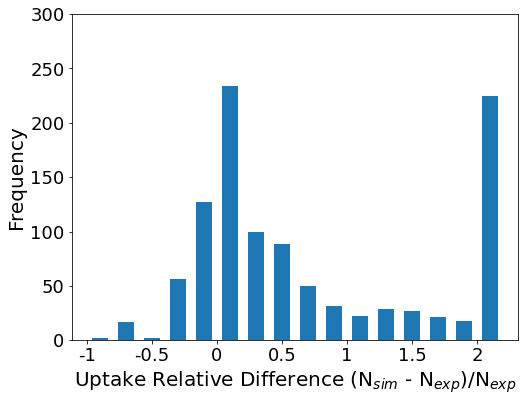

In [164]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2 ]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_n2['rel_diff'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='mid')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 50, 100, 150, 200, 250, 300])
ax.set_yticklabels([0, 50, 100, 150, 200, 250, 300], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('N2_rel_diff_histogram.png', dpi=600, bbox_inches='tight')

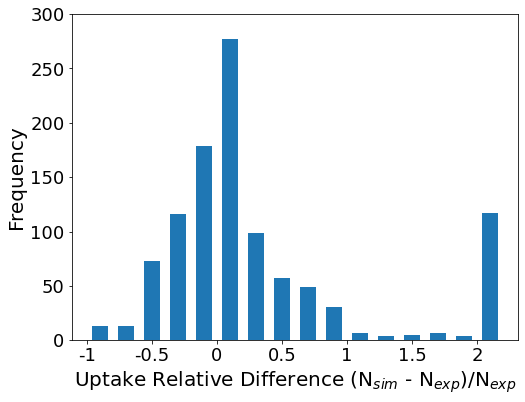

In [165]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2 ]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_n2['rel_diff_scaled'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='mid')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 50, 100, 150, 200, 250, 300])
ax.set_yticklabels([0, 50, 100, 150, 200, 250, 300], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('N2_rel_diff_histogram_scaled.png', dpi=600, bbox_inches='tight')

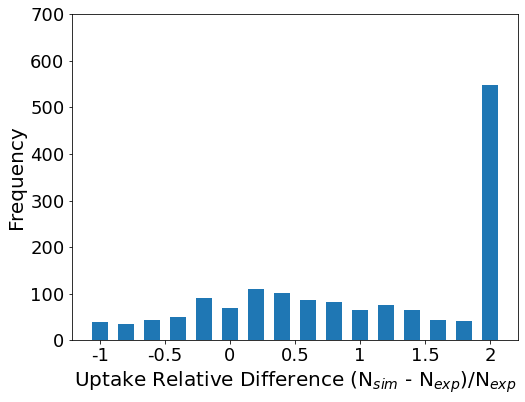

In [166]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_co2['rel_diff'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='left')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, ])
ax.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, ], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('CO2_rel_diff_histogram.png', dpi=600, bbox_inches='tight')

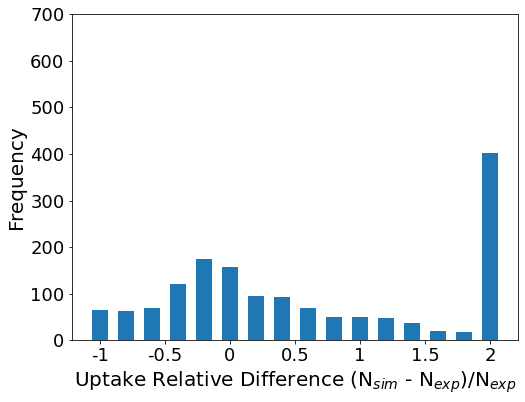

In [169]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_co2['rel_diff_scaled'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='left')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, ])
ax.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, ], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('CO2_rel_diff_histogram_scaled.png', dpi=600, bbox_inches='tight')

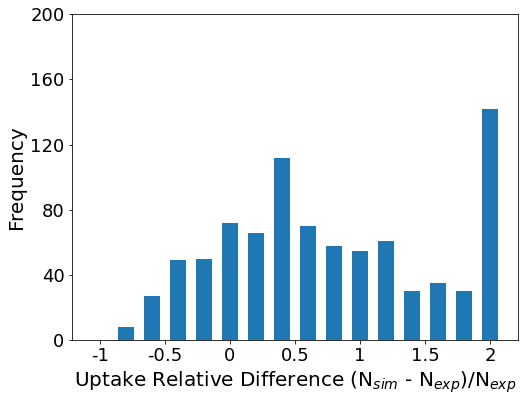

In [170]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_h2['rel_diff'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='left')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 40, 80, 120, 160, 200])
ax.set_yticklabels([0, 40, 80, 120, 160, 200], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('H2_rel_diff_histogram.png', dpi=600, bbox_inches='tight')

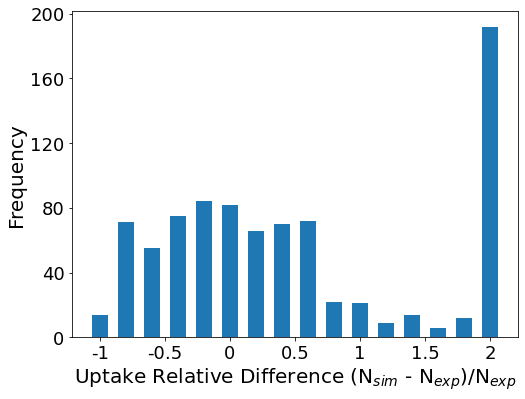

In [171]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_h2['rel_diff_scaled'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='left')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 40, 80, 120, 160, 200])
ax.set_yticklabels([0, 40, 80, 120, 160, 200], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('H2_rel_diff_histogram_scaled.png', dpi=600, bbox_inches='tight')

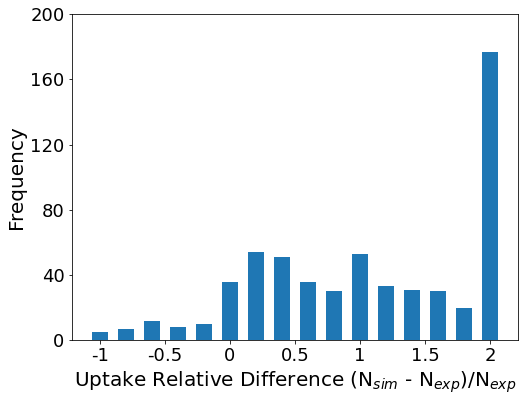

In [172]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_ch4['rel_diff'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='left')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 40, 80, 120, 160, 200])
ax.set_yticklabels([0, 40, 80, 120, 160, 200], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('CH4_rel_diff_histogram.png', dpi=600, bbox_inches='tight')

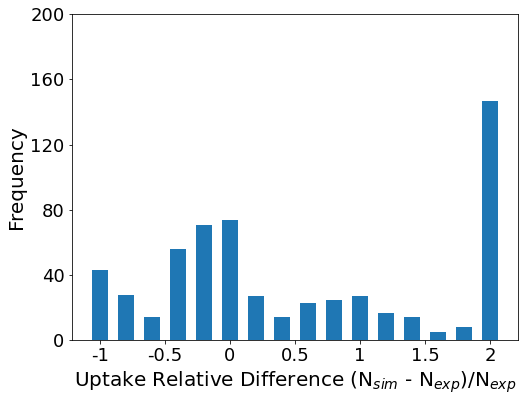

In [173]:
bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.clip(df_ch4['rel_diff_scaled'], bins[0], bins[-1]), bins=bins, rwidth=0.6, align='left')
ax.set_xlabel('Uptake Relative Difference (N$_{sim}$ - N$_{exp}$)/N$_{exp}$', fontsize=20)        
ax.set_xticks([-1, -0.5, 0, 0.5, 1, 1.5, 2])
ax.set_xticklabels([-1, -0.5, 0, 0.5, 1, 1.5, 2], fontsize=18)
ax.set_yticks([0, 40, 80, 120, 160, 200])
ax.set_yticklabels([0, 40, 80, 120, 160, 200], fontsize=18)
ax.set_ylabel('Frequency', fontsize=20)

fig.savefig('CH4_rel_diff_histogram_scaled.png', dpi=600, bbox_inches='tight')

(-100.0, 7000.0)

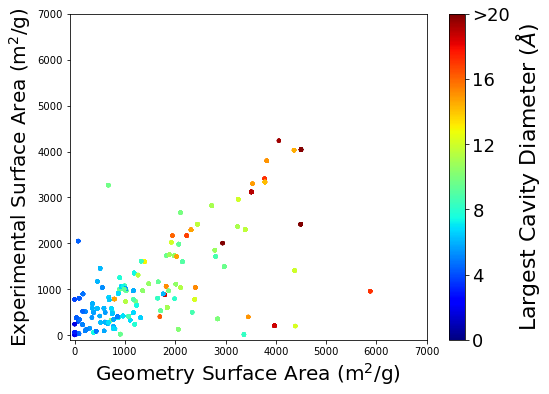

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
a0 = ax.scatter(compared_data['SA'], compared_data['exp_SA'], c= compared_data['LCD'], s=10, cmap='jet')
cbar0 = fig.colorbar(a0, ticks=[0, 4, 8, 12, 16, 20], ax=ax)
cbar0.set_label(label=r'Largest Cavity Diameter ($\AA$)', fontsize=22,fontname="Arial")
a0.set_clim(0,20)
cbar0.ax.tick_params(labelsize=18)
cbar0.ax.set_yticklabels([0, 4, 8, 12, 16, '>20'])

#ax.set_yticks([-1000, -500, 0, 500, 1000, 1500, 2000, 2500])
#ax.set_yticklabels([-1000, -500, 0, 500, 1000, 1500, 2000, 2500], fontsize=18)
#ax.set_xticks([0, 20000, 40000, 60000, 80000, 100000, 120000])
#ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=18)

ax.set_xlabel(r'Geometry Surface Area (m$^2$/g)', fontsize=20)
ax.set_ylabel(r'Experimental Surface Area (m$^2$/g)', fontsize=20)
ax.set_xlim(-100,7000)
ax.set_ylim(-100,7000)

In [185]:
sa_df = compared_data.drop_duplicates(subset='SA')

sa_df.sort_values(by='SA_ratio')

,exp_pressure,exp_uptake,sim_pressure,sim_uptake,sim_error,temperature,adsorbate,adsorbent,PLD,LCD,SA,exp_SA,SA_ratio,sim_uptake_scaled,uptake_diff,rel_diff,uptake_diff_scaled,rel_diff_scaled,abs_rel_diff
2503,16826.1,34.4860,16826.0,0.000000,0.000000,195,Carbon Dioxide,FUFBEP.Non-disordered_MOF_subset_DDEC.cif,0.87,1.74,0.00,244.0,0.000000,NaN,-34.486000,-1.000000,NaN,NaN,1.000000
735,100649.0,942.2500,100649.0,149.576986,1.128056,77,Nitrogen,DUBXOP.MOF_subset_DDEC.cif,3.65,4.41,71.34,2052.0,0.034766,4302.382608,-792.673014,-0.841256,3360.132608,3.566073,0.841256
2878,101645.0,22.4000,101645.0,47.162165,1.677862,263,Carbon Dioxide,YEYBOV.Non-disordered_MOF_subset_DDEC.cif,3.78,4.36,33.50,385.0,0.087013,542.012945,24.762165,1.105454,519.612945,23.197006,1.105454
1771,10669.9,116.7470,10670.0,96.719028,0.416395,77,Nitrogen,KAFTUI_clean_DDEC.cif,3.05,4.98,33.80,378.0,0.089418,1081.650670,-20.027972,-0.171550,964.903670,8.264912,0.171550
2074,10982.8,7.9233,10983.0,9.735142,0.412982,273,Methane,EWUCOP_clean_DDEC.cif,3.39,4.28,91.19,810.0,0.112580,86.472917,1.811842,0.228673,78.549617,9.913750,0.228673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,13479.5,33.0137,13480.0,552.223620,3.259317,77,Nitrogen,CIFMAH_clean_DDEC.cif,8.78,10.19,2061.45,132.3,15.581633,35.440678,519.209920,15.727105,2.426978,0.073514,15.727105
2406,10248.9,60.8871,10249.0,1062.032010,3.829190,77,Nitrogen,DOZCEC_clean_DDEC.cif,11.71,18.64,3973.79,206.5,19.243535,55.189029,1001.144910,16.442644,-5.698071,-0.093584,16.442644
1551,10307.9,50.6122,10308.0,1334.834817,10.254209,77,Nitrogen,ECOLEP_clean_DDEC.cif,11.29,12.20,4387.59,202.0,21.720743,61.454382,1284.222617,25.373776,10.842182,0.214221,25.373776
4873,100626.0,38.6777,100626.0,81.252906,1.726361,296,Carbon Dioxide,AHOLAM.Non-disordered_MOF_subset_DDEC.cif,5.02,9.46,907.34,27.0,33.605185,2.417868,42.575206,1.100769,-36.259832,-0.937487,1.100769
